# NLP Analysis of Email Threads

In this project, I am experimenting with the NLTK library in Python to analyze the email threads between my friend and I. This projects uses techniques such as tokenization, NLP-specific data cleaning (removing stop words), TFIDF, word stemming, word cloud and more. The project answers my own question of my writing style and what I talk about the most in my writings.

 The first steps are outlined below:
1. Import libraries used
2. read in the files
3. tokenize words
4. and remove puncutations and stop words.

In [3]:
# import required libraries
import nltk
import math
import pandas as pd
import numpy as np
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

In [4]:
# read files and print out head of files 
amy_raw = open("amy_data.txt")
mark_raw = open("mark_data.txt")

amy_raw = amy_raw.read()
mark_raw = mark_raw.read()

print("Start of Amy's emails: \n")
print(amy_raw[0:100])
print("\n")
print("Start of Mark's emails: \n")
print(mark_raw[0:100])
print("\n")

Start of Amy's emails: 

Dear Mark,



It’s almost three o clock and it’s still really hard for me to fall asleep. Whenever I


Start of Mark's emails: 

My Dear Amy,

I am really tired... so tired to a point when I saw your email an hour ago, I just did




In [6]:
# Tokenize text into sentences
amy_sentences = sent_tokenize(amy_raw)
mark_sentences = sent_tokenize(mark_raw)

print("Amy wrote {0} sentences to Mark, and Mark wrote {1} sentences back.\n".format(len(amy_sentences), len(mark_sentences)))

print("Amy's emails in sentences:")
print(amy_sentences[0:3])
print("\n")
print("Mark's emails in sentences:")
print(mark_sentences[0:3])

Amy wrote 200 sentences to Mark, and Mark wrote 134 sentences back.

Amy's emails in sentences:
['Dear Mark,\n\n\n\nIt’s almost three o clock and it’s still really hard for me to fall asleep.', 'Whenever I think of the happy moments we share, the happiness that I was able to bring to you, and just the happiness that I’m able to have, I feel so painful that it feels like my chest is torn into pieces.', 'Babe I really miss the good times, the unbroken me.']


Mark's emails in sentences:
["My Dear Amy,\n\nI am really tired... so tired to a point when I saw your email an hour ago, I just didn't even have the strength to type something back for you, but I think I should reply to this, to tell you how much I love you and value you and have faith in you.", "It's 1:10 am here in New Zealand so it's already 4:10 there in the States.", 'I hope you have already fallen asleep.']


In [7]:
# Tokenize text into words
amy_words = word_tokenize(amy_raw)
mark_words = word_tokenize(mark_raw)

print("Amy wrote {0} words in her emails，and Mark wrote {1} in his.\n".format(len(amy_words), len(mark_words)))
print("Amy's emails in words:")
print(amy_words[0:10])
print("\n")
print("Mark's emails in words:")
print(mark_words[0:10])

Amy wrote 5138 words in her emails，and Mark wrote 2828 in his.

Amy's emails in words:
['Dear', 'Mark', ',', 'It', '’', 's', 'almost', 'three', 'o', 'clock']


Mark's emails in words:
['My', 'Dear', 'Amy', ',', 'I', 'am', 'really', 'tired', '...', 'so']


In [8]:
# Remove punctuations among words
amy_no_punc = []
for w in amy_words:
    if w.isalpha():
        amy_no_punc.append(w.lower())
        
mark_no_punc = []
for w in mark_words:
    if w.isalpha():
        mark_no_punc.append(w.lower())
        
print("Amy's words without punctuations:")
print(amy_no_punc[0:20])
print(len(amy_no_punc))
print("\n")
print("Mark's words without punctuations:")
print(mark_no_punc[0:20])
print(len(mark_no_punc))

Amy's words without punctuations:
['dear', 'mark', 'it', 's', 'almost', 'three', 'o', 'clock', 'and', 'it', 's', 'still', 'really', 'hard', 'for', 'me', 'to', 'fall', 'asleep', 'whenever']
4500


Mark's words without punctuations:
['my', 'dear', 'amy', 'i', 'am', 'really', 'tired', 'so', 'tired', 'to', 'a', 'point', 'when', 'i', 'saw', 'your', 'email', 'an', 'hour', 'ago']
2432


In [9]:
# Remove stopwards 
stopwords = stopwords.words("english")

amy_clean = []
for w in amy_no_punc:
    if w not in stopwords:
        amy_clean.append(w)
        
mark_clean = []
for w in mark_no_punc:
    if w not in stopwords:
        mark_clean.append(w)

print("Amy's words without stopwords:")
print(amy_clean[0:20])
print(len(amy_clean))
print("\n")
print("Mark's words without stopwords:")
print(mark_clean[0:20])
print(len(mark_clean))

Amy's words without stopwords:
['dear', 'mark', 'almost', 'three', 'clock', 'still', 'really', 'hard', 'fall', 'asleep', 'whenever', 'think', 'happy', 'moments', 'share', 'happiness', 'able', 'bring', 'happiness', 'able']
1890


Mark's words without stopwords:
['dear', 'amy', 'really', 'tired', 'tired', 'point', 'saw', 'email', 'hour', 'ago', 'even', 'strength', 'type', 'something', 'back', 'think', 'reply', 'tell', 'much', 'love']
1045


In [16]:
# find the frequeny distribution of words
amy_fdist = FreqDist(amy_clean)
mark_fdist = FreqDist(mark_clean)
print("Amy's most used words:")
print(amy_fdist.most_common(20))
print("\n")
print("Mark's most used words:")
print(mark_fdist.most_common(20))

Amy's most used words:
[('feel', 43), ('know', 34), ('love', 34), ('much', 31), ('make', 25), ('want', 25), ('like', 20), ('still', 19), ('really', 18), ('better', 17), ('time', 16), ('call', 15), ('good', 14), ('na', 13), ('care', 13), ('well', 13), ('best', 13), ('able', 12), ('get', 12), ('started', 12)]


Mark's most used words:
[('love', 27), ('amy', 20), ('want', 18), ('much', 16), ('like', 11), ('really', 10), ('best', 10), ('make', 8), ('writing', 8), ('one', 7), ('ever', 7), ('made', 7), ('time', 7), ('relationship', 7), ('think', 6), ('new', 6), ('hope', 6), ('life', 6), ('good', 6), ('get', 6)]


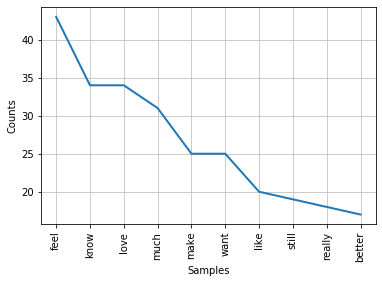

In [17]:
# Plotting the frequency distributionb
amy_fdist.plot(10)

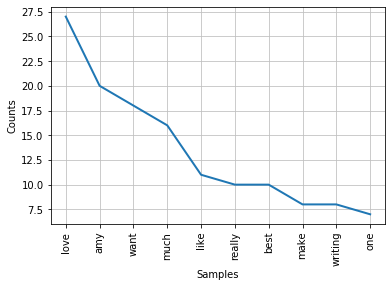

In [18]:
mark_fdist.plot(10)

In [19]:
# Using the stemmed words instead to create a frequency dictionary
porter = PorterStemmer()

amy_freq = {}
for w in amy_clean:
    w = porter.stem(w)
    if w in amy_freq:
        amy_freq[w] += 1
    else:
        amy_freq[w] = 1

mark_freq = {}
for w in mark_clean:
    w = porter.stem(w)
    if w in mark_freq:
        mark_freq[w] += 1
    else:
        mark_freq[w] = 1

## TF-IDF

TFIDF is an interesting index that helps us find out the words a certain document use that is unique to that document. For example. Here, I am tweaking the traditional tf-idf to fit into the analysis of the email thread:


$$TF = \frac{m_{ij}}{w_i}$$
$$m_{ij} = number\ of\  times\  word\  j\  is\  used\  by\  i\  (Amy\ or\ Mark)$$
$$w_i = total\ number\ of\ words\ written\ by\ i$$

$$IDF = \log \frac{s}{\sum_{1}^{2} m_{ij}}$$
$$s = number\ of\ total\ sentences$$

$$TFIDF = TF \cdot IDF$$


In [20]:
# create a function to calculate TF-IDF values for each stemmed word
users = {"amy": 0, "mark": 1}
word_count = [len(amy_clean), len(mark_clean)]
freq = [amy_freq, mark_freq]
sent_count = len(amy_sentences) + len(mark_sentences)
def tf_idf(word, user):
    i = users[user]
    if word not in freq[i]: return 0
    tf = freq[i][word]/word_count[i]
    if word not in freq[0]:
        word_total = freq[1][word]
    elif word not in freq[1]:
        word_total = freq[0][word]
    else: 
        word_total = freq[0][word] + freq[1][word]
    idf = math.log(sent_count / word_total)
    return tf*idf

tf_idf("love", "amy")

0.03539887812127355

In [21]:
# create a hashmap of TF-IDF values for each stemmed word for both users
amy_tfidf = {}
for w in amy_freq:
    amy_tfidf[w] = tf_idf(w, "amy")

mark_tfidf = {}
for w in mark_freq:
    mark_tfidf[w] = tf_idf(w, "mark")

tfidf = [amy_tfidf, mark_tfidf]
df = pd.DataFrame(tfidf, index=['amy', 'mark'])
df = df.transpose()
df.head(10)

,amy,mark
dear,0.004090,0.018494
mark,0.016418,0.014847
almost,0.007480,NaN
three,0.006669,0.008042
clock,0.003075,NaN
still,0.026898,0.010242
realli,0.023609,0.023722
hard,0.018462,0.009106
fall,0.004987,0.004510
asleep,0.002708,0.004898


In [22]:
# Calculate the unique index of our use of words
unique_amy = []
for i in range(len(df["amy"])):
    if pd.isnull(df["amy"][i]):
        unique_amy.append(0)
    elif pd.isnull(df["mark"][i]):
        unique_amy.append(df["amy"][i]/0.01)
    else:
        unique_amy.append(df["amy"][i]/df["mark"][i])
df['unique_amy'] = unique_amy

unique_mark = []
for i in range(len(df["amy"])):
    if pd.isnull(df["mark"][i]):
        unique_mark.append(0)
    elif pd.isnull(df["amy"][i]):
        unique_mark.append(df["mark"][i]/0.01)
    else:
        unique_mark.append(df["mark"][i]/df["amy"][i])
df['unique_mark'] = unique_mark

df.head(10)

,amy,mark,unique_amy,unique_mark
dear,0.004090,0.018494,0.221164,4.521531
mark,0.016418,0.014847,1.105820,0.904306
almost,0.007480,NaN,0.748020,0.000000
three,0.006669,0.008042,0.829365,1.205742
clock,0.003075,NaN,0.307468,0.000000
still,0.026898,0.010242,2.626323,0.380761
realli,0.023609,0.023722,0.995238,1.004785
hard,0.018462,0.009106,2.027337,0.493258
fall,0.004987,0.004510,1.105820,0.904306
asleep,0.002708,0.004898,0.552910,1.808612


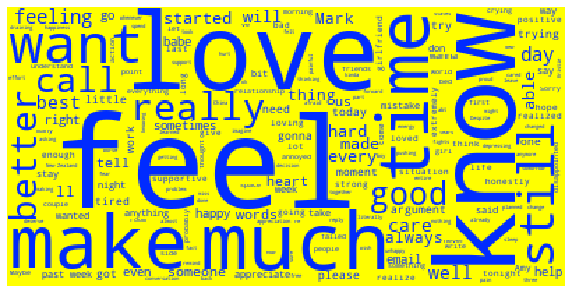

In [34]:
# Generate a wordcloud
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

amy_wordcloud = WordCloud(background_color='yellow').generate(amy_raw)
amy_wordcloud.recolor(color_func = color_func)
plt.figure(figsize = (10,10))
plt.imshow(amy_wordcloud)
plt.axis("off")
plt.show()

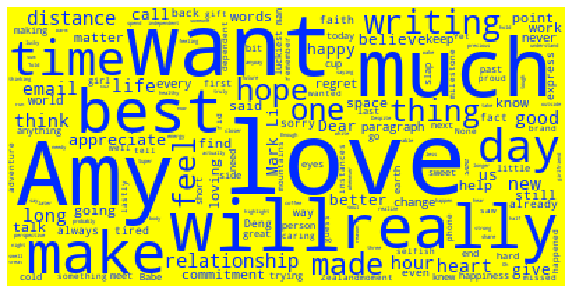

In [36]:
mark_wordcloud = WordCloud(background_color='yellow').generate(mark_raw)
mark_wordcloud.recolor(color_func = color_func)
plt.figure(figsize = (10,10))
plt.imshow(mark_wordcloud)
plt.axis("off")
plt.show()

## Conclusion

I definitely talk about my own feelings way too much in my writings which explains why I use the words "feel" and "know" a lot more often. On the other hand, my friend is much better at referring my name in the writings, and focuses less on himself. We boht have our own usage of words that stresses the intensity of the matter, such as "really" and "much", and both talks about the future and our plans, indicated by usage of "want" and "will" in our writings.   


## Next Steps

NLTK can be applied to analyze many more situations. One specific project that could be interesting is to scrape VC Guide (https://www.vcguide.co/) and find out the relationship between recurring words in founders' comments and the corresponding rating of that investor. What traits makes a good/bad investor? Another idea for a follow up project is to conduct sentiment analysis for texts using other functions in nltk.